In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# K-Means Clustering Algorithm

data = pd.read_csv('assets/income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


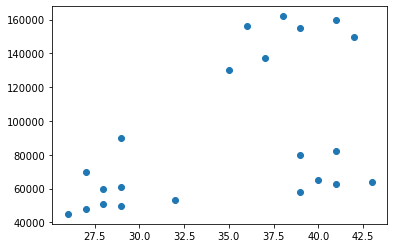

In [3]:
plt.scatter(data['Age'], data['Income($)'])

In [4]:
# Creating K-Mean object with sklearn.cluster.KMeans()
kmData = KMeans(n_clusters=3)

In [5]:
# predict some fitting w.r.t Age and Income data
kPredicted = kmData.fit_predict(data[['Age', 'Income($)']])
kPredicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
# Appending predicted cluster column to the main dataframe.
data['cluster'] = kPredicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
kmData.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

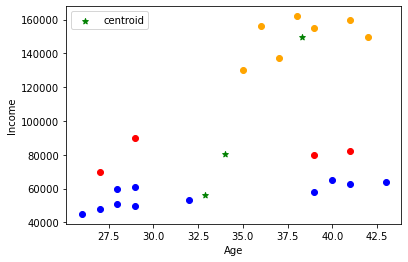

In [8]:
# After defining number of clusters(3), data can be formed into 3 separate dataframe
# in order to obtain initial raw cluster.

dFrame1 = data[data.cluster==0]
dFrame2 = data[data.cluster==1]
dFrame3 = data[data.cluster==2]
plt.scatter(dFrame1.Age, dFrame1['Income($)'], color='blue')
plt.scatter(dFrame2.Age, dFrame2['Income($)'], color='orange')
plt.scatter(dFrame3.Age, dFrame3['Income($)'], color='red')
plt.scatter(kmData.cluster_centers_[:,0], kmData.cluster_centers_[:,1], 
            color='green', marker='*', label='centroid')


plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [9]:
# sklearn.preprocessing.MinMaxScaler = Transform features by scaling each feature to a given range.
# sklearn.preprocessing.scale = Center to the mean and component wise scale to unit variance.

scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

data.head()



,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


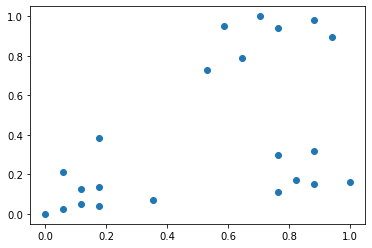

In [10]:
plt.scatter(data.Age, data['Income($)'])

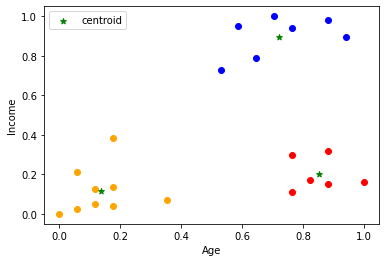

In [11]:
## Repeating the same process after preprocessing the data

# predict some fitting w.r.t Age and Income data
kPredicted = kmData.fit_predict(data[['Age', 'Income($)']])

# Appending predicted cluster column to the main dataframe.
data['cluster'] = kPredicted

kmData.cluster_centers_
# After defining number of clusters(3), data can be formed into 3 separate dataframe
# in order to obtain initial raw cluster.

dFrame1 = data[data.cluster==0]
dFrame2 = data[data.cluster==1]
dFrame3 = data[data.cluster==2]
plt.scatter(dFrame1.Age, dFrame1['Income($)'], color='blue')
plt.scatter(dFrame2.Age, dFrame2['Income($)'], color='orange')
plt.scatter(dFrame3.Age, dFrame3['Income($)'], color='red')
plt.scatter(kmData.cluster_centers_[:,0], kmData.cluster_centers_[:,1], 
            color='green', marker='*', label='centroid')


plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

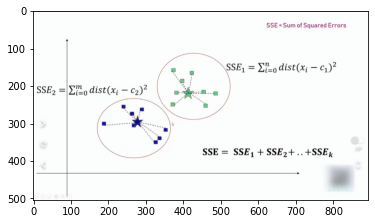

In [12]:
# Elbow Plot: Defining the optimum number of clusters
sse_img = cv2.imread('assets/SSE.png')
elb_img = cv2.imread('assets/elbowTeq.png')
plt.imshow(sse_img)


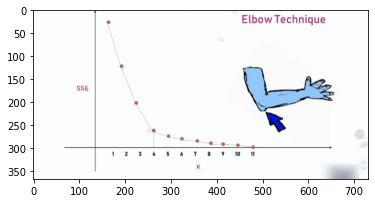

In [13]:
plt.imshow(elb_img)

In [14]:
# Implementing elbow plot for the data to see the optimum no of clusters
SSE = []
for elb in range(1,10):
    km = KMeans(n_clusters=elb)
    km.fit(data[['Age', 'Income($)']])
    SSE.append(km.inertia_)
    
SSE    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2755825568722976,
 0.22443334487241415,
 0.18269415744795042,
 0.13762504146528043,
 0.10188787724979426]

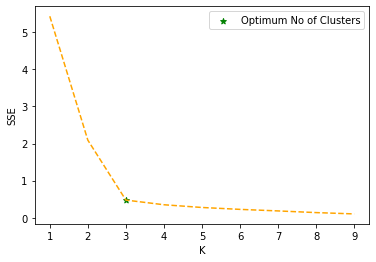

In [15]:
plt.plot(range(1,10), SSE, '--', color='orange')
plt.xlabel('K')
plt.ylabel('SSE')
plt.scatter(3, SSE[2], color='green', marker='*', label='Optimum No of Clusters')
plt.legend()